# Example Julia

## Documentation de fonction

In [1]:
"""
    bspline(p, j, x)

Return the value at x in [0,1[ of the B-spline with integer nodes of degree p with support starting at j.
Implemented recursively using the [De Boor's Algorithm](https://en.wikipedia.org/wiki/De_Boor%27s_algorithm)

```math
B_{i,0}(x) := \\left\\{
\\begin{matrix}
1 & \\mathrm{if}  \\quad t_i ≤ x < t_{i+1} \\\\
0 & \\mathrm{otherwise} 
\\end{matrix}
\\right.
```

```math
B_{i,p}(x) := \\frac{x - t_i}{t_{i+p} - t_i} B_{i,p-1}(x) 
+ \\frac{t_{i+p+1} - x}{t_{i+p+1} - t_{i+1}} B_{i+1,p-1}(x).
```
"""
function bspline(p::Int, j::Int, x::Float64)
   if p == 0
       if j == 0
           return 1.0
       else
           return 0.0
       end
   else
       w = (x - j) / p
       w1 = (x - j - 1) / p
   end
   return (w * bspline(p - 1, j, x) + (1 - w1) * bspline(p - 1, j + 1, x))
end

bspline

Switch the next cell from `Markdown` to `Code` format

?bspline

In [2]:
using Pkg
Pkg.add("Plots")
Pkg.add("DataFrames")
Pkg.add("StatsPlots");

   Updating registry at `~/.julia/registries/General`


  Resolving package versions...


Updating `~/work/agrocampus/agrocampus/Project.toml`
  [a93c6f00] 

+ DataFrames v0.21.7
  [91a5bcdd] + Plots v1.6.3
  [f3b207a7] + StatsPlots v0.14.13
Updating `~/work/agrocampus/agrocampus/Manifest.toml`
  [621f4979] 

+ AbstractFFTs v0.5.0
  [79e6a3ab] + Adapt v2.0.2
  [7d9fca2a] + Arpack v0.4.0


  [68821587] + Arpack_jll v3.5.0+3
  [13072b0f] + AxisAlgorithms v1.0.0
  [6e34b625] + Bzip2_jll v1.0.6+4
  [324d7699] + CategoricalArrays v0.8.2
  [aaaa29a8] + Clustering v0.14.1
  [35d6a980] + ColorSchemes v3.9.0
  [3da002f7] + ColorTypes v0.10.9
  [5ae59095] + Colors v0.12.4
  [34da2185] + Compat v3.15.0
  [e66e0078] + CompilerSupportLibraries_jll v0.3.3+0
  [d38c429a] + Contour v0.5.4
  [9a962f9c] + DataAPI v1.3.0
  [a93c6f00] + DataFrames v0.21.7
  [864edb3b] + DataStructures v0.18.4
  [e2d170a0] + DataValueInterfaces v1.0.0
  [e7dc6d0d] + DataValues v0.4.13
  [b4f34e82] + Distances v0.9.0
  [31c24e10] + Distributions v0.23.11
  [ffbed154] + DocStringExtensions v0.8.3
  [c87230d0] + FFMPEG v0.4.0
  [b22a6f82] + FFMPEG_jll v4.3.1+2
  [7a1cc6ca] + FFTW v1.2.4
  [f5851436] + FFTW_jll v3.3.9+5
  [1a297f60] + FillArrays v0.9.6
  [53c48c17] + FixedPointNumbers v0.8.4
  [d7e528f0] + FreeType2_jll v2.10.1+4
  [559328eb] + FriBidi_jll v1.0.5+5
  [28b8d3ca] + GR v0.52.0
  [5c1252a2] + Geome

No Changes to `~/work/agrocampus/agrocampus/Project.toml`
No Changes to `~/work/agrocampus/agrocampus/Manifest.toml`
  Resolving package versions...


No Changes to `~/work/agrocampus/agrocampus/Project.toml`
No Changes to `~/work/agrocampus/agrocampus/Manifest.toml`


┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


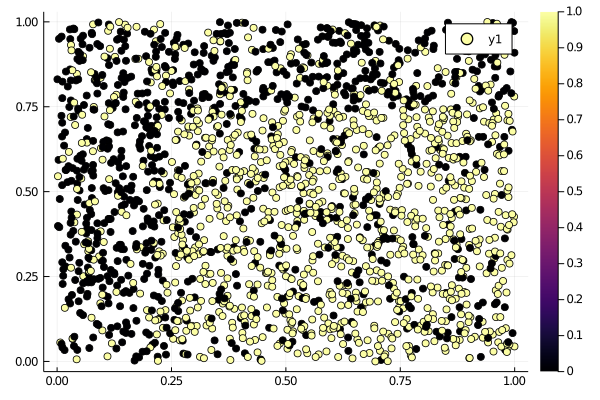

In [3]:
using Random, Plots

function generate_data( n = 2000, seed = 1234 )
    seuil = 0.25
    rng = MersenneTwister(seed)
    X1 = rand( rng, n)
    X2 = rand( rng, n)
    U  = rand( rng, n)
    Y  = zeros(Int,n)
    Y[(X1 .<= 0.25) .& (U  .<= seuil)] .= 1
    Y[(X1 .>  0.25) .& (X2 .>= 0.75) .& (U .<= seuil)] .= 1
    Y[(X1 .>  0.25) .& (X2 .<  0.75) .& (U .>  seuil)] .= 1
    return X1, X2, Y
end

X1, X2, Y = generate_data()
scatter(X1,X2, marker_z = Y)

In [4]:
using DataFrames, StatsPlots

┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1278


┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1278


In [5]:
data = DataFrame( X1=X1, X2=X2, Y=Y)
head(data)

,X1,X2,Y
,Float64,Float64,Int64
1,0.590845,0.612889,1
2,0.766797,0.523674,1
3,0.566237,0.795861,0
4,0.460085,0.793631,0
5,0.794026,0.781348,0
6,0.854147,0.997615,0


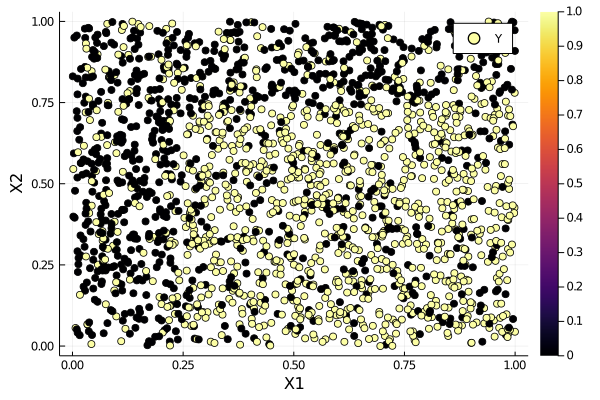

In [6]:
@df data scatter(:X1,:X2, zcolor= :Y, xaxis = "X1", yaxis="X2", lab="Y")


In [7]:
"""
[x1,x2,x1^2,x1x2,x2^2……x2^6]
"""
function map_features(X1,X2)
    degree = 6
    out = ones(size(X1[:,1]))
    for i=1:6
        for j=0:i
            out = hcat(out,(X1.^(i-j)).*(X2.^j))
        end
    end
    return out
end

map_features

In [8]:
X = map_features(X1,X2)

2000×28 Array{Float64,2}:
 1.0  0.590845   0.612889   …  0.0492577    0.0510955   0.0530019
 1.0  0.766797   0.523674      0.0442187    0.0301986   0.0206237
 1.0  0.566237   0.795861      0.128631     0.180795    0.254111
 1.0  0.460085   0.793631      0.0839754    0.144855    0.249869
 1.0  0.794026   0.781348      0.234988     0.231236    0.227544
 1.0  0.854147   0.997615   …  0.72263      0.844007    0.985772
 1.0  0.200586   0.748584      0.0126347    0.0471525   0.175972
 1.0  0.298614   0.874355      0.0521161    0.152598    0.446814
 1.0  0.246837   0.789279      0.0236453    0.0756075   0.24176
 1.0  0.579672   0.957212      0.282097     0.465826    0.769219
 1.0  0.648882   0.993974   …  0.41099      0.629565    0.964383
 1.0  0.0109059  0.662258      2.28787e-5   0.00138931  0.0843653
 1.0  0.066423   0.199035      6.92392e-6   2.07473e-5  6.21688e-5
 ⋮                          ⋱  ⋮                        
 1.0  0.324239   0.52499       0.00798606   0.0129306   0.0209365
 1